In [1]:
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.image as mpimg
import skimage
import numpy as np
pic = mpimg.imread(r'C:\Users\Keerthi Admin\Documents\MIS\Homework 3\hendrix_final.png')
# pic = im2double(pic)
plt.imshow(pic)
arr = np.array(pic)
print(arr.shape)

(2000, 2000, 3)


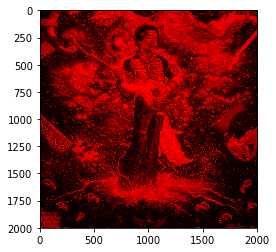

In [2]:
arr_Red = arr.copy()
arr_Red[:,:,1] = np.zeros((2000,2000))
arr_Red[:,:,2] = np.zeros((2000,2000))
plt.imshow(arr_Red)

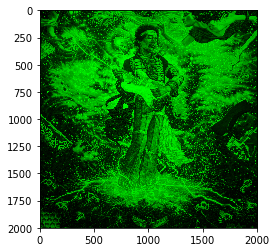

In [3]:
arr_Green = arr.copy()
arr_Green[:,:,0] = np.zeros((2000,2000))
arr_Green[:,:,2] = np.zeros((2000,2000))
plt.imshow(arr_Green)

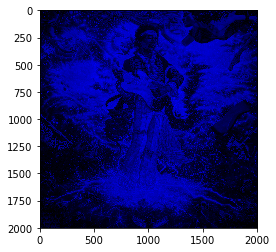

In [4]:
arr_Blue = arr.copy()
arr_Blue[:,:,0] = np.zeros((2000,2000))
arr_Blue[:,:,1] = np.zeros((2000,2000))
plt.imshow(arr_Blue)

In [5]:
ur, sr, vhr = np.linalg.svd(arr_Red[:,:, 0], full_matrices=False)
# print(ur.shape)
# print(sr.shape)
# print(vhr.shape)

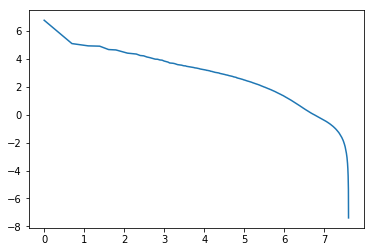

In [6]:
x= np.log(range(1,2001))
y = np.log(sr)
plt.plot(x,y)
plt.show()

In [7]:
ug, sg, vhg = np.linalg.svd(arr_Green[:,:,1], full_matrices=False)
print(ug.shape)
print(sg.shape)
print(vhg.shape)

(2000, 2000)
(2000,)
(2000, 2000)


In [8]:
ub, sb, vhb = np.linalg.svd(arr_Blue[:,:,2],full_matrices=False)
print(ub.shape)
print(sb.shape)
print(vhb.shape)

(2000, 2000)
(2000,)
(2000, 2000)


In [9]:
def reconstruction_image(u, s, v, n):
    return np.matrix(u[:, :n]) * np.diag(s[:n]) * np.matrix(v[:n, :]) 

In [10]:
recon_red = np.array(reconstruction_image(ur, sr, vhr, 190))
recon_green = np.array(reconstruction_image(ug, sg, vhg, 190))
recon_blue = np.array(reconstruction_image(ub, sb, vhb, 190))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


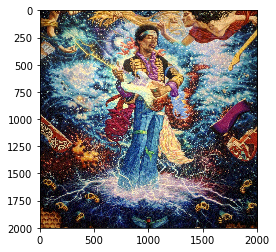

In [11]:
recon_image = np.dstack((recon_red, recon_green, recon_blue))
plt.imshow(recon_image)
plt.show()

In [18]:
def error_calc(u,s,v,n,orig,channel):
    error = np.zeros(n)
    for i in range(0,n):
        error[i] = np.linalg.norm(np.subtract(orig[:,:,channel],reconstruction_image(u,s,v,i))) 
    return error

In [19]:
error_Red = error_calc(ur,sr,vhr,2000,arr_Red,0)

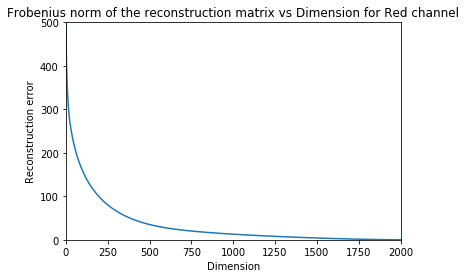

In [28]:
plt.plot(error_Red)
plt.xlim(0, 2000)
plt.ylim(0, 500)
plt.title("Frobenius norm of the reconstruction matrix vs Dimension for Red channel")
plt.xlabel('Dimension')
plt.ylabel('Reconstruction error')
plt.show()

In [21]:
error_Green = error_calc(ug,sg,vhg,2000,arr_Green,1)

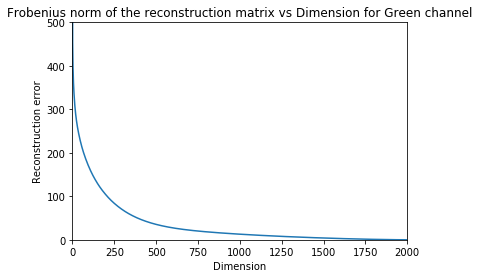

In [27]:
plt.plot(error_Green)
plt.xlim(0, 2000)
plt.ylim(0, 500)
plt.title("Frobenius norm of the reconstruction matrix vs Dimension for Green channel")
plt.xlabel('Dimension')
plt.ylabel('Reconstruction error')
plt.show()

In [24]:
error_Blue = error_calc(ub,sb,vhb,2000,arr_Blue,2)

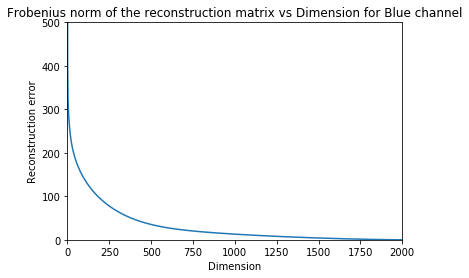

In [29]:
plt.plot(error_Blue)
plt.xlim(0, 2000)
plt.ylim(0, 500)
plt.title("Frobenius norm of the reconstruction matrix vs Dimension for Blue channel")
plt.xlabel('Dimension')
plt.ylabel('Reconstruction error')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


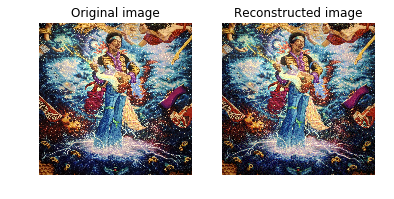

<Figure size 432x288 with 0 Axes>

In [26]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(pic)
plt.title('Original image')
plt.axis('off')
plt.grid()

f.add_subplot(1,2, 2)
plt.imshow(recon_image)
plt.title('Reconstructed image')
plt.grid()
plt.axis('off')
plt.show(block=True)
plt.tight_layout()